### Step 1: Run the following cell to download the source code, and set up the environment

In [ ]:
!git clone https://github.com/TianhaoW/RLMath
!cd RLMath

import sys
sys.path.append('/content/RLMath')

# Examples of Using NoThreeCollinearEnv

In [26]:
from src.envs import NoThreeCollinearEnv, Point

env = NoThreeCollinearEnv(5,5)        # creating the environment with 5*5 grid

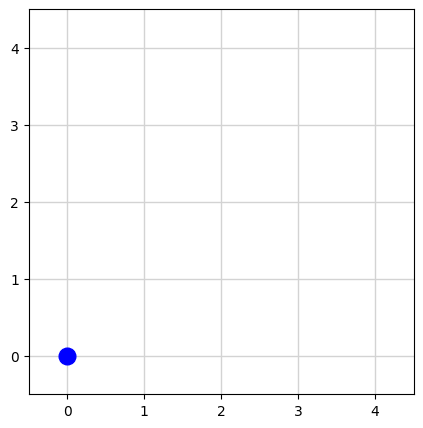

In [20]:
env.self_play_add_point(Point(0,0))  # try adding a point to the environment

game over


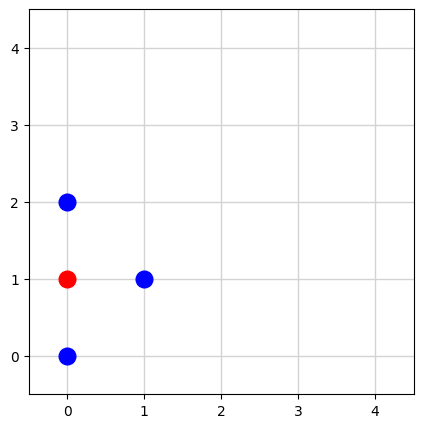

In [22]:
env.self_play_add_point(Point(1, 1), plot=False)  # try adding a point to the environment without plotting
env.self_play_add_point(Point(0, 2), plot=False)
env.self_play_add_point(Point(0, 1))

In [24]:
env.points         # Print all legal points in the environment

[Point(x=0, y=0), Point(x=1, y=1), Point(x=0, y=2)]

### If you add a point causing collinear triple, it will be plotted as a red point, and the game ends. You need to reset the environment before you play again

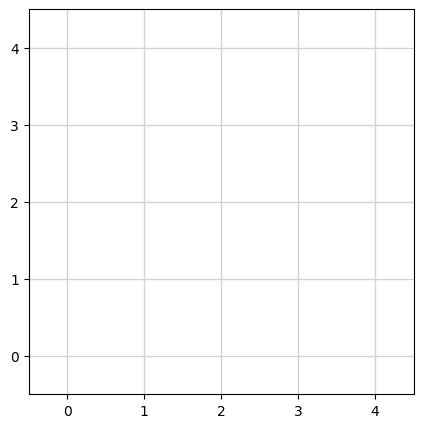

In [25]:
env.reset()       # reset the environment
env.plot()        # plot the environment, and there is no points there

# Examples of Using NoThreeCollinearEnv with a Priority Function
**Remark:** The plotting function of this environment will also plot the priority score (normalized), and also the illegal points that you cannot add. The illegal point will be plotted as red points

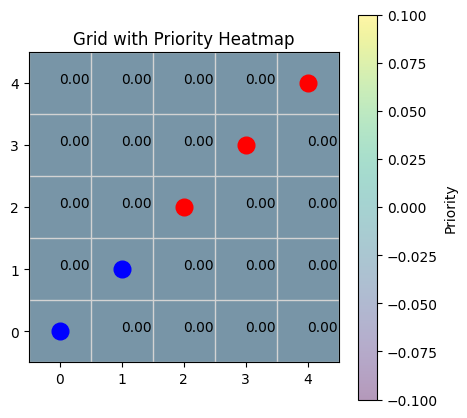

In [31]:
from src.envs import NoThreeCollinearEnvWithPriority, Point

env = NoThreeCollinearEnvWithPriority(5,5) # Creating the 5*5 grid with default priority function ()
env.self_play_add_point(Point(0,0), plot=False)
env.self_play_add_point(Point(1, 1), plot=False)
env.plot()

## Examples using the greedy algorithm

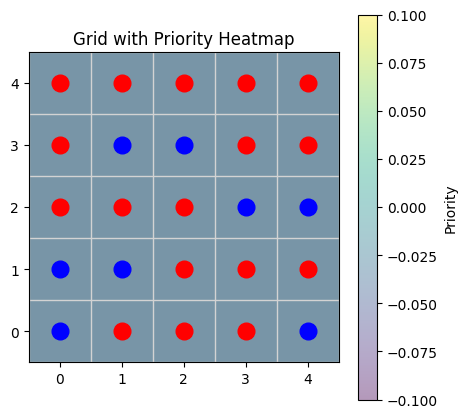

Found 8 number of points by greedy search


In [35]:
env.reset()   # reset the environment to clear all existing points
result = env.greedy_search()  # run the greedy search algorithm in the current environment
env.plot()
print(f"Found {result} number of points by greedy search")

## Examples of greedy search with a customized priority function

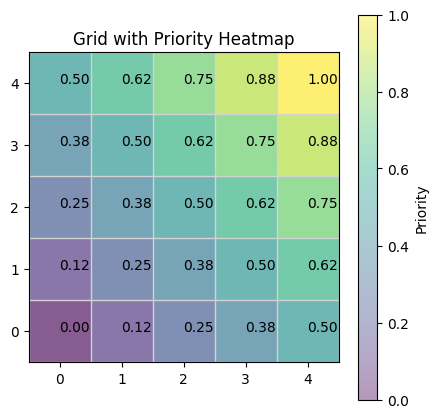

In [36]:
# Please define the priority function in this way.
def my_priority_func(p: Point, grid_size) -> float:
    x, y = p.x, p.y     # gets the x,y coordinate of the point
    m,n = grid_size     # gets the size of the grids. m is number of rows, and n is number of cols
    return x+y          # define your priority score here

env = NoThreeCollinearEnvWithPriority(5,5, my_priority_func)    # creating the environment with customized priority function
env.plot()

Found 8 number of points by greedy search
[Point(x=4, y=4), Point(x=4, y=3), Point(x=3, y=4), Point(x=3, y=3), Point(x=2, y=1), Point(x=1, y=2), Point(x=0, y=2), Point(x=2, y=0)]


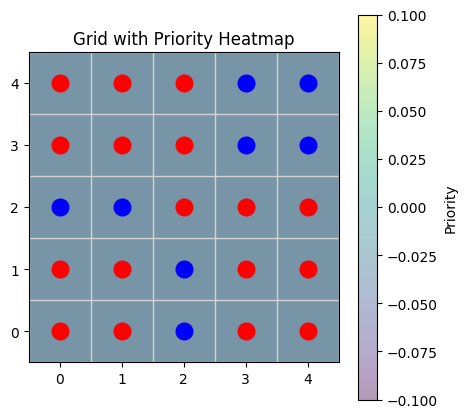

In [38]:
result = env.greedy_search()
print(f"Found {result} number of points by greedy search")
print(env.points)
env.plot()

## Adding points step by step using Greedy Search

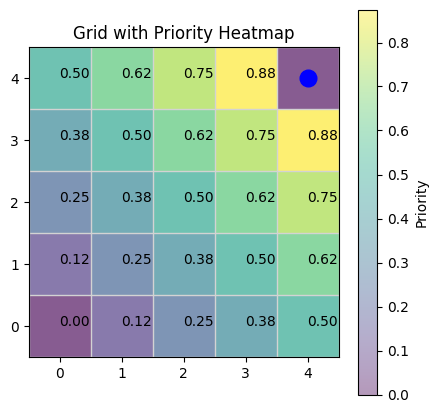

Point(x=4, y=4)

In [39]:
env.reset()
env.greedy_action_step() # This will add a point according to the priority function.

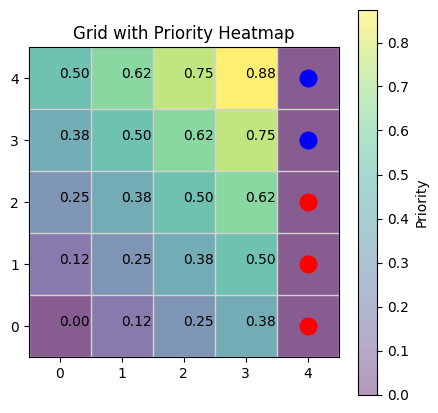

Point(x=4, y=3)

In [40]:
env.greedy_action_step() # This will add a point according to the priority function.

# Example of using HJSW Construction

In [47]:
def HJSW_construct(p, k=1):
    points = []
    # Use integer division for half intervals
    half_p = (p - 1) // 2
    half_p_plus = (p + 1) // 2

    # Loop over x in extended range, with shifted origin to avoid floats
    for x in range(-half_p, p + half_p + 1):
        for y in range(2 * p):
            if (x * y) % p != k:
                continue

            # Check which block it falls into
            if (
                # A blocks
                (0 * p < x <= 0 * p + half_p and 1 * p + half_p_plus <= y < 2 * p) or
                (1 * p < x <= 1 * p + half_p and 0 * p + half_p_plus <= y < 1 * p) or
                (1 * p < x <= 1 * p + half_p and 1 * p + half_p_plus <= y < 2 * p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # B blocks
                (0 * p + half_p_plus <= x < 1 * p and 1 * p + half_p_plus <= y < 2 * p) or
                (-1 * p + half_p_plus <= x < 0 * p and 0 * p + half_p_plus <= y < 1 * p) or
                (-1 * p + half_p_plus <= x < 0 * p and 1 * p + half_p_plus <= y < 2 * p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # C blocks
                (0 * p < x <= 0 * p + half_p and 0 * p < y <= 0 * p + half_p) or
                (1 * p < x <= 1 * p + half_p and 0 * p < y <= 0 * p + half_p) or
                (1 * p < x <= 1 * p + half_p and 1 * p < y <= 1 * p + half_p)
            ):
                points.append((x+half_p, y))
                continue

            if (
                # D blocks
                (0 * p + half_p_plus <= x < 1 * p and 0 * p < y <= 0 * p + half_p) or
                (-1 * p + half_p_plus <= x < 0 * p and 0 * p < y <= 0 * p + half_p) or
                (-1 * p + half_p_plus <= x < 0 * p and 1 * p < y <= 1 * p + half_p)
            ):
                points.append((x+ half_p, y))

    return points

In [48]:
p = 5
HJSW_points = HJSW_construct(p, k=1)
print(f"{len(HJSW_points)} points constructed:", HJSW_points)

12 points constructed: [(0, 2), (0, 7), (1, 4), (1, 9), (3, 1), (4, 8), (5, 2), (6, 9), (8, 1), (8, 6), (9, 3), (9, 8)]


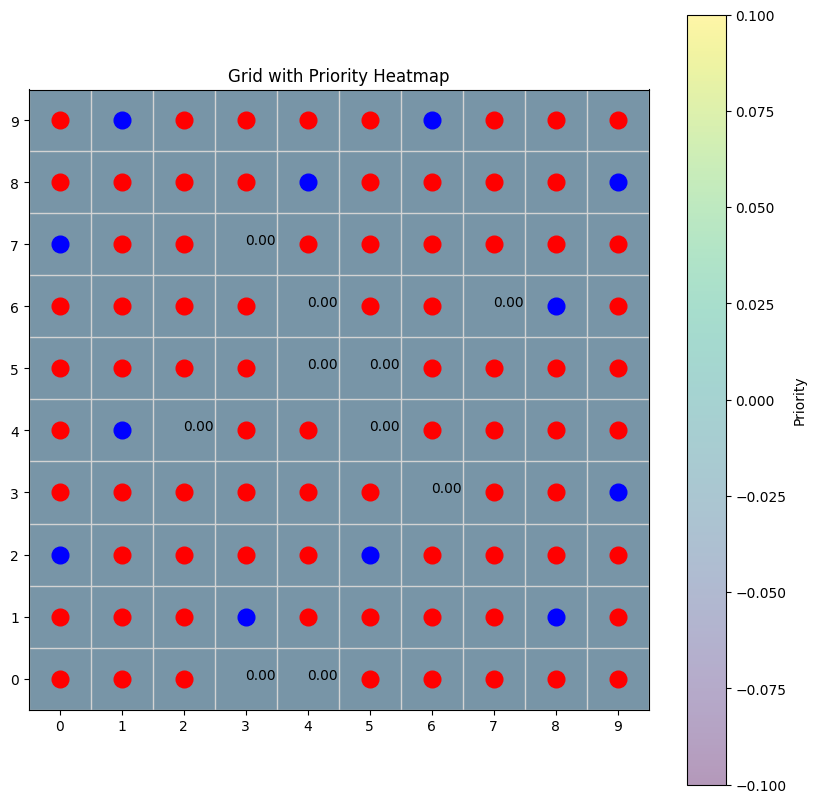

In [49]:
env = NoThreeCollinearEnvWithPriority(2*p,2*p)  # creating the 2p*2p grid
for point in HJSW_points:
    env.self_play_add_point(Point(point[0],point[1]), plot=False)
env.plot()

### We can also run greedy search to potentially add more points

In [52]:
env.greedy_search()
print(len(env.points), "number of points found")
print(env.points)

15 number of points found
[Point(x=0, y=2), Point(x=0, y=7), Point(x=1, y=4), Point(x=1, y=9), Point(x=3, y=1), Point(x=4, y=8), Point(x=5, y=2), Point(x=6, y=9), Point(x=8, y=1), Point(x=8, y=6), Point(x=9, y=3), Point(x=9, y=8), Point(x=3, y=0), Point(x=7, y=6), Point(x=2, y=4)]
